In [2]:
import os 
import sys

sys.path.append('..')
from src.visualization import EcommerceVisualizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Kendi modülümüzü import et
from src.visualization import EcommerceVisualizer

# Görselleştirici nesnesini oluştur
viz = EcommerceVisualizer(figsize=(12, 8))

# Pandas ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Kütüphaneler başarıyla yüklendi!")

✅ Kütüphaneler başarıyla yüklendi!


In [3]:
df = pd.read_csv(r'C:\Users\emirh\Desktop\product-intelligence-hub\data\processed\sample_3k.csv')

print("📊 Veri seti başarıyla yüklendi!")
print(f"Veri boyutu: {df.shape[0]:,} satır × {df.shape[1]} sütun")

# İlk 5 satırı görüntüle
print("\n🔍 İlk 5 satır:")
print(df.head())


📊 Veri seti başarıyla yüklendi!
Veri boyutu: 3,000 satır × 9 sütun

🔍 İlk 5 satır:
                event_time event_type  product_id          category_id  \
0  2019-11-19 08:35:46 UTC       view    30200005  2053013554449088861   
1  2019-11-26 14:16:08 UTC       view     1005115  2053013555631882655   
2  2019-11-10 17:50:50 UTC       view    15700275  2053013559733912211   
3  2019-11-04 14:23:52 UTC       view     1004589  2053013555631882655   
4  2019-11-29 17:11:17 UTC   purchase     5300157  2053013563173241677   

            category_code     brand   price    user_id  \
0                     NaN     elari   77.20  512412397   
1  electronics.smartphone     apple  916.37  568675496   
2                     NaN  imperial  206.16  513262731   
3  electronics.smartphone      inoi   61.36  562973725   
4                     NaN   philips   37.56  560750791   

                           user_session  
0  f62be3c5-18af-4ab1-bdce-f1a1119a3df4  
1  c857db53-cd0a-480d-a93f-dd738be33126

In [4]:
print("="*80)
print("📋 VERİ SETİ GENEL BAKIŞ")
print("="*80)

# Temel bilgiler
print(f"📏 Boyutlar: {df.shape[0]:,} satır × {df.shape[1]} sütun")
print(f"💾 Bellek kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 Sütun Bilgileri:")
print(df.info())

print("\n🎯 Veri Tipleri:")
print(df.dtypes.value_counts())

📋 VERİ SETİ GENEL BAKIŞ
📏 Boyutlar: 3,000 satır × 9 sütun
💾 Bellek kullanımı: 1.01 MB

📊 Sütun Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     3000 non-null   object 
 1   event_type     3000 non-null   object 
 2   product_id     3000 non-null   int64  
 3   category_id    3000 non-null   int64  
 4   category_code  2049 non-null   object 
 5   brand          2587 non-null   object 
 6   price          3000 non-null   float64
 7   user_id        3000 non-null   int64  
 8   user_session   3000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 211.1+ KB
None

🎯 Veri Tipleri:
object     5
int64      3
float64    1
Name: count, dtype: int64



🔍 EKSİK DEĞERLER ANALİZİ
⚠️ Eksik değerler mevcut:
        Sütun  Eksik_Sayı  Eksik_Yüzde
category_code         951    31.700000
        brand         413    13.766667


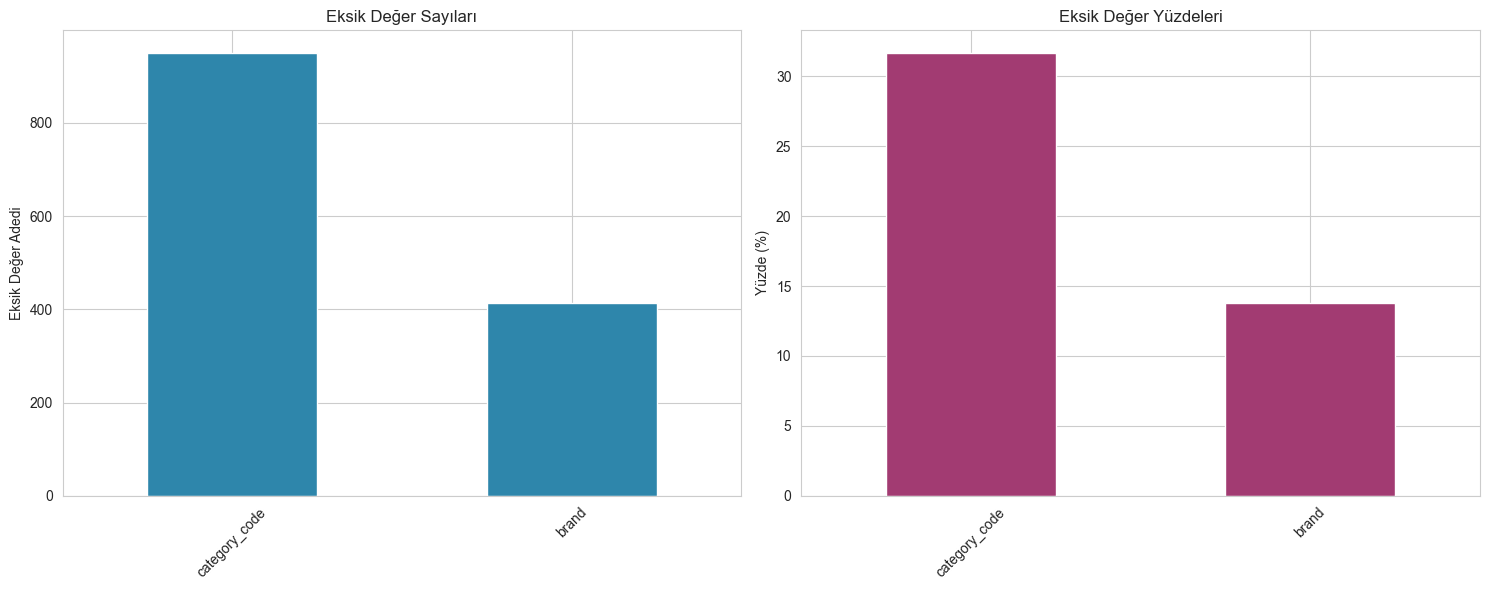

In [5]:
print("\n" + "="*50)
print("🔍 EKSİK DEĞERLER ANALİZİ")
print("="*50)

# Eksik değerleri kontrol et
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Sütun': missing_data.index,
    'Eksik_Sayı': missing_data.values,
    'Eksik_Yüzde': missing_percent.values
})

missing_df = missing_df[missing_df['Eksik_Sayı'] > 0].sort_values('Eksik_Sayı', ascending=False)

if len(missing_df) > 0:
    print("⚠️ Eksik değerler mevcut:")
    print(missing_df.to_string(index=False))
    
    # Eksik değerleri görselleştir
    viz.plot_missing_values(df)
else:
    print("✅ Eksik değer bulunamadı!")


### 📊 Eksik Veri Yorumu
Yukarıdaki analiz gösteriyor ki:
- **category_code** %31.7 eksik: Ürünlerin 3'te 1'inde kategori bilgisi yok
- **brand** %13.8 eksik: Her 7 üründen 1'inde marka bilgisi eksik
- Bu eksiklikler veri kalitesini düşürüyor ve analiz sonuçlarını etkileyebilir
- **Aksiyon gerekli:** Veri temizleme ve imputasyon stratejisi uygulanmalı

In [6]:
print("\n" + "="*50)
print("🔄 TEKRARLANAN KAYITLAR ANALİZİ")
print("="*50)

# Duplicate kontrolü
duplicate_count = df.duplicated().sum()
duplicate_percent = (duplicate_count / len(df)) * 100

print(f"🔢 Toplam tekrarlanan kayıt: {duplicate_count:,}")
print(f"📊 Tekrarlanan kayıt oranı: {duplicate_percent:.2f}%")

if duplicate_count > 0:
    print("⚠️ Tekrarlanan kayıtlar mevcut!")
    # İlk birkaç duplicate kaydı göster
    print("\n🔍 İlk 5 tekrarlanan kayıt:")
    print(df[df.duplicated()].head())
else:
    print("✅ Tekrarlanan kayıt bulunamadı!")


🔄 TEKRARLANAN KAYITLAR ANALİZİ
🔢 Toplam tekrarlanan kayıt: 0
📊 Tekrarlanan kayıt oranı: 0.00%
✅ Tekrarlanan kayıt bulunamadı!



📈 VERİ TİPLERİ GÖRSELLEŞTİRME


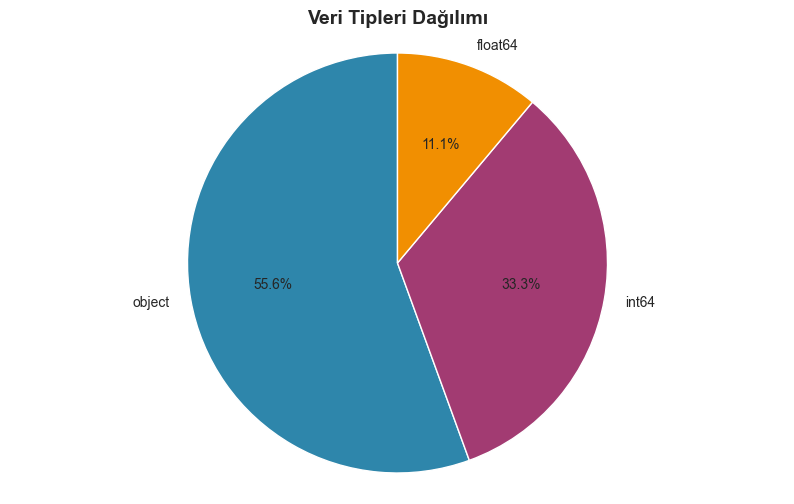

In [7]:
print("\n" + "="*50)
print("📈 VERİ TİPLERİ GÖRSELLEŞTİRME")
print("="*50)

# Veri tiplerini görselleştir
viz.plot_data_types(df)


🏷️ KATEGORİ ANALİZİ
📊 Toplam kategori sayısı: 99
🔢 Kategori içeren satır sayısı: 2,049
❌ Kategori bilgisi olmayan satır: 951


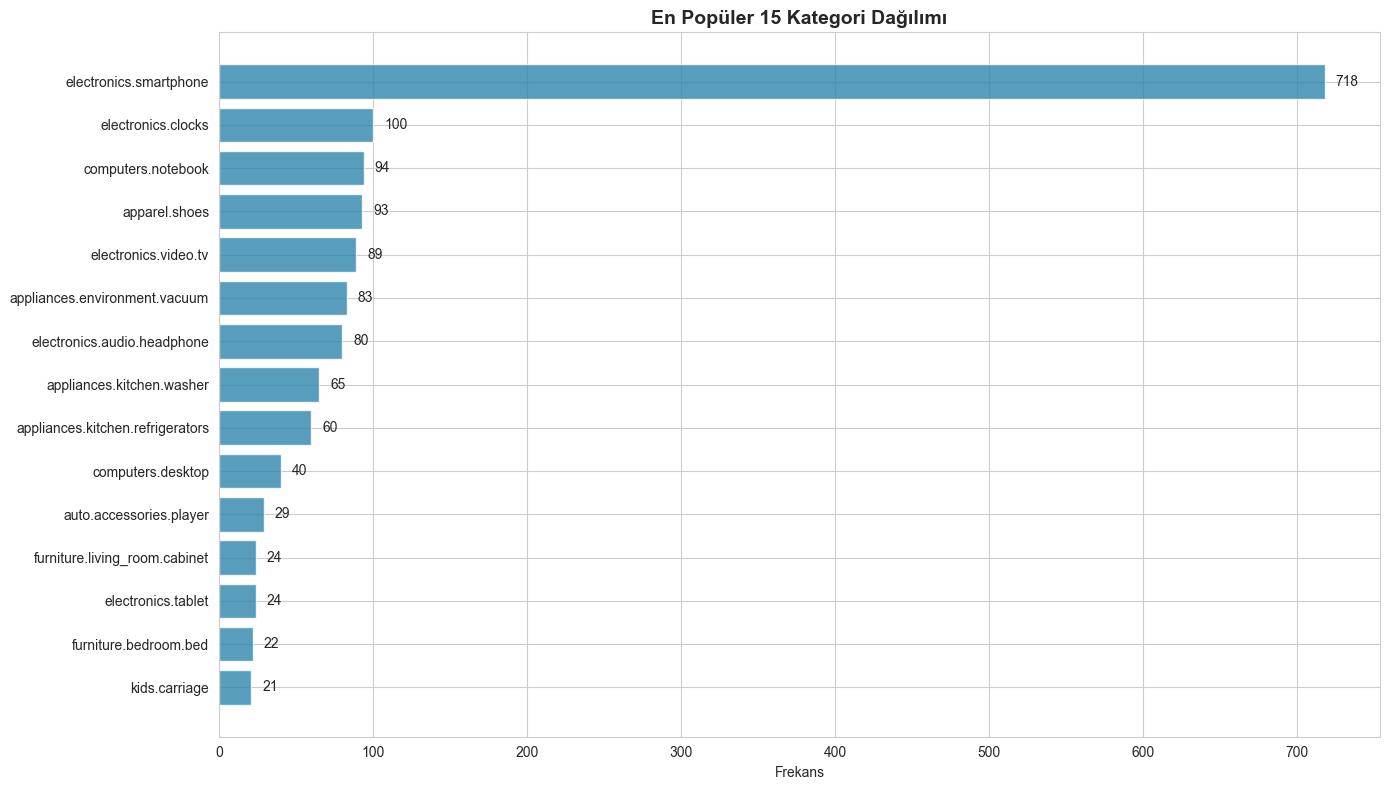


🏆 Top 10 Kategori:
 1. electronics.smartphone: 718 ürün
 2. electronics.clocks: 100 ürün
 3. computers.notebook: 94 ürün
 4. apparel.shoes: 93 ürün
 5. electronics.video.tv: 89 ürün
 6. appliances.environment.vacuum: 83 ürün
 7. electronics.audio.headphone: 80 ürün
 8. appliances.kitchen.washer: 65 ürün
 9. appliances.kitchen.refrigerators: 60 ürün
10. computers.desktop: 40 ürün


In [8]:
print("\n" + "="*60)
print("🏷️ KATEGORİ ANALİZİ")
print("="*60)

# category_code sütunu var mı kontrol et
if 'category_code' in df.columns:
    print(f"📊 Toplam kategori sayısı: {df['category_code'].nunique():,}")
    print(f"🔢 Kategori içeren satır sayısı: {df['category_code'].notna().sum():,}")
    print(f"❌ Kategori bilgisi olmayan satır: {df['category_code'].isna().sum():,}")
    
    # En popüler kategorileri görselleştir
    viz.plot_category_distribution(df, column='category_code', top_n=15)
    
    # Top 10 kategoriyi yazdır
    print("\n🏆 Top 10 Kategori:")
    top_categories = df['category_code'].value_counts().head(10)
    for i, (category, count) in enumerate(top_categories.items(), 1):
        print(f"{i:2d}. {category}: {count:,} ürün")
else:
    print("⚠️ 'category_code' sütunu bulunamadı!")


### 🎯 Kategori İçgörüleri
**Önemli bulgular:**
- **Smartphone dominansı:** 718 ürünle açık ara lider (%35 pay)
- **Electronics ağırlığı:** İlk 10'da 4 electronics kategorisi var
- **Kategorisiz sorun:** 951 ürün (%31.7) kategorisiz
- **Strateji:** Smartphone odaklı pazarlama, kategorisiz ürünler için ML kategorilendirme


🌳 KATEGORİ HİYERARŞİSİ ANALİZİ
🔍 Ana kategori sayısı: 12


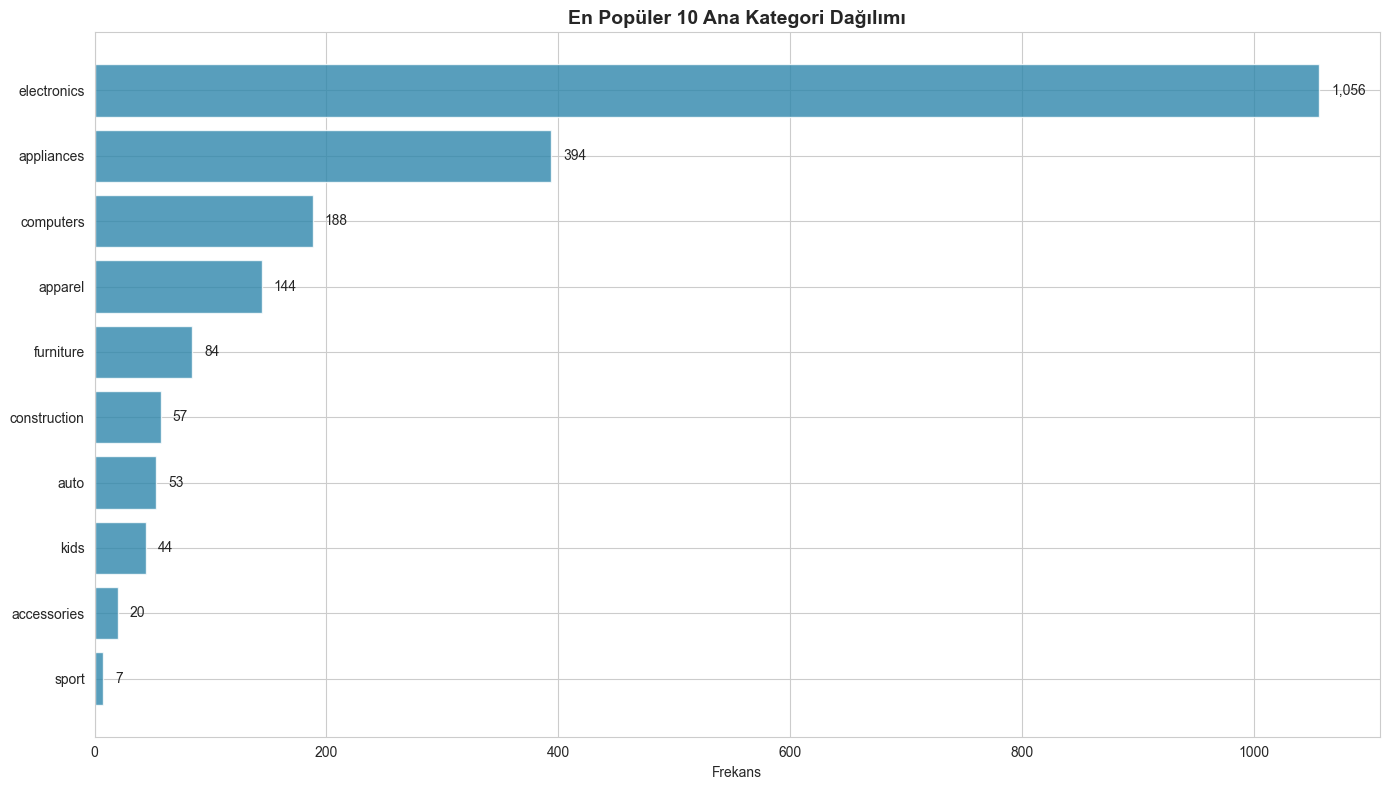


📋 Ana Kategoriler:
 1. electronics: 1,056 ürün
 2. appliances: 394 ürün
 3. computers: 188 ürün
 4. apparel: 144 ürün
 5. furniture: 84 ürün
 6. construction: 57 ürün
 7. auto: 53 ürün
 8. kids: 44 ürün
 9. accessories: 20 ürün
10. sport: 7 ürün
11. medicine: 1 ürün
12. country_yard: 1 ürün


In [9]:
if 'category_code' in df.columns:
    print("\n" + "="*50)
    print("🌳 KATEGORİ HİYERARŞİSİ ANALİZİ")
    print("="*50)
    
    # Ana kategorileri çıkar (electronics.smartphone → electronics)
    df_temp = df.dropna(subset=['category_code']).copy()
    df_temp['main_category'] = df_temp['category_code'].str.split('.').str[0]
    
    print(f"🔍 Ana kategori sayısı: {df_temp['main_category'].nunique()}")
    
    # Ana kategorileri görselleştir
    viz.plot_category_distribution(df_temp, column='main_category', top_n=10, 
                                 title="Ana Kategori Dağılımı")
    
    # Ana kategorileri yazdır
    print("\n📋 Ana Kategoriler:")
    main_categories = df_temp['main_category'].value_counts()
    for i, (category, count) in enumerate(main_categories.items(), 1):
        print(f"{i:2d}. {category}: {count:,} ürün")



🏢 MARKA ANALİZİ
🏷️ Toplam marka sayısı: 481
✅ Marka bilgisi olan ürün: 2,587
❌ Marka bilgisi olmayan ürün: 413


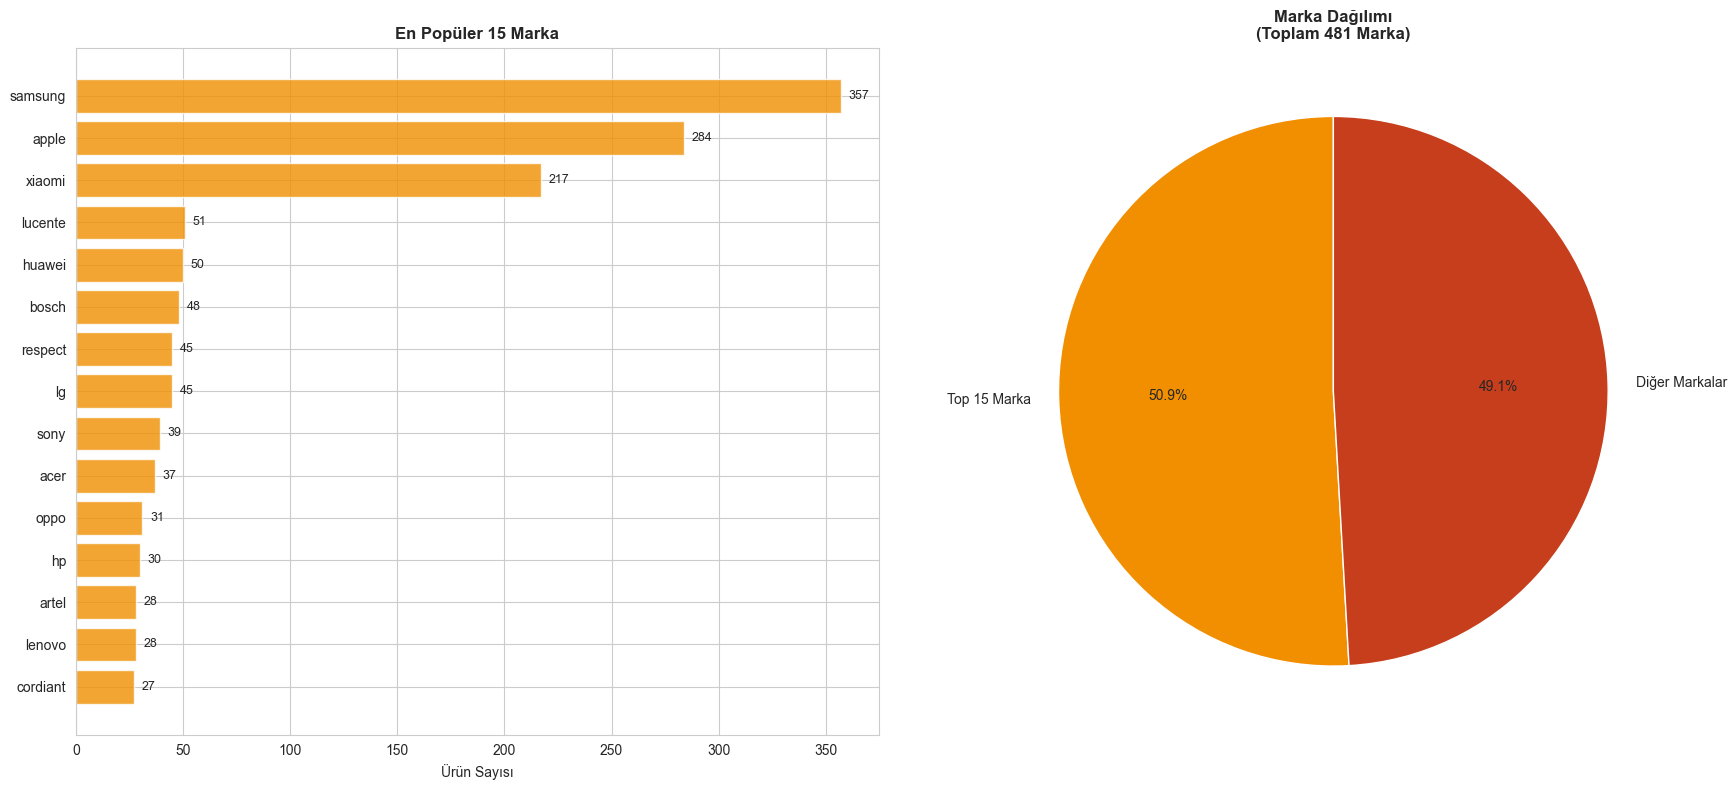


🏆 Top 10 Marka:
 1. samsung: 357 ürün
 2. apple: 284 ürün
 3. xiaomi: 217 ürün
 4. lucente: 51 ürün
 5. huawei: 50 ürün
 6. bosch: 48 ürün
 7. respect: 45 ürün
 8. lg: 45 ürün
 9. sony: 39 ürün
10. acer: 37 ürün


In [10]:
print("\n" + "="*60)
print("🏢 MARKA ANALİZİ")
print("="*60)

if 'brand' in df.columns:
    # Marka istatistikleri
    total_brands = df['brand'].nunique()
    brands_with_data = df['brand'].notna().sum()
    brands_missing = df['brand'].isna().sum()
    
    print(f"🏷️ Toplam marka sayısı: {total_brands:,}")
    print(f"✅ Marka bilgisi olan ürün: {brands_with_data:,}")
    print(f"❌ Marka bilgisi olmayan ürün: {brands_missing:,}")
    
    # Marka analizini görselleştir
    viz.plot_brand_analysis(df, top_n=15)
    
    # Top 10 markayı yazdır
    print("\n🏆 Top 10 Marka:")
    top_brands = df['brand'].value_counts().head(10)
    for i, (brand, count) in enumerate(top_brands.items(), 1):
        print(f"{i:2d}. {brand}: {count:,} ürün")
else:
    print("⚠️ 'brand' sütunu bulunamadı!")


💰 FİYAT ANALİZİ
💵 Fiyat bilgisi olan ürün: 3,000
❌ Fiyat bilgisi olmayan ürün: 0

📊 Fiyat İstatistikleri:
   • Minimum fiyat: $0.00
   • Maksimum fiyat: $2572.23
   • Ortalama fiyat: $292.99
   • Medyan fiyat: $156.88
   • Standart sapma: $359.20


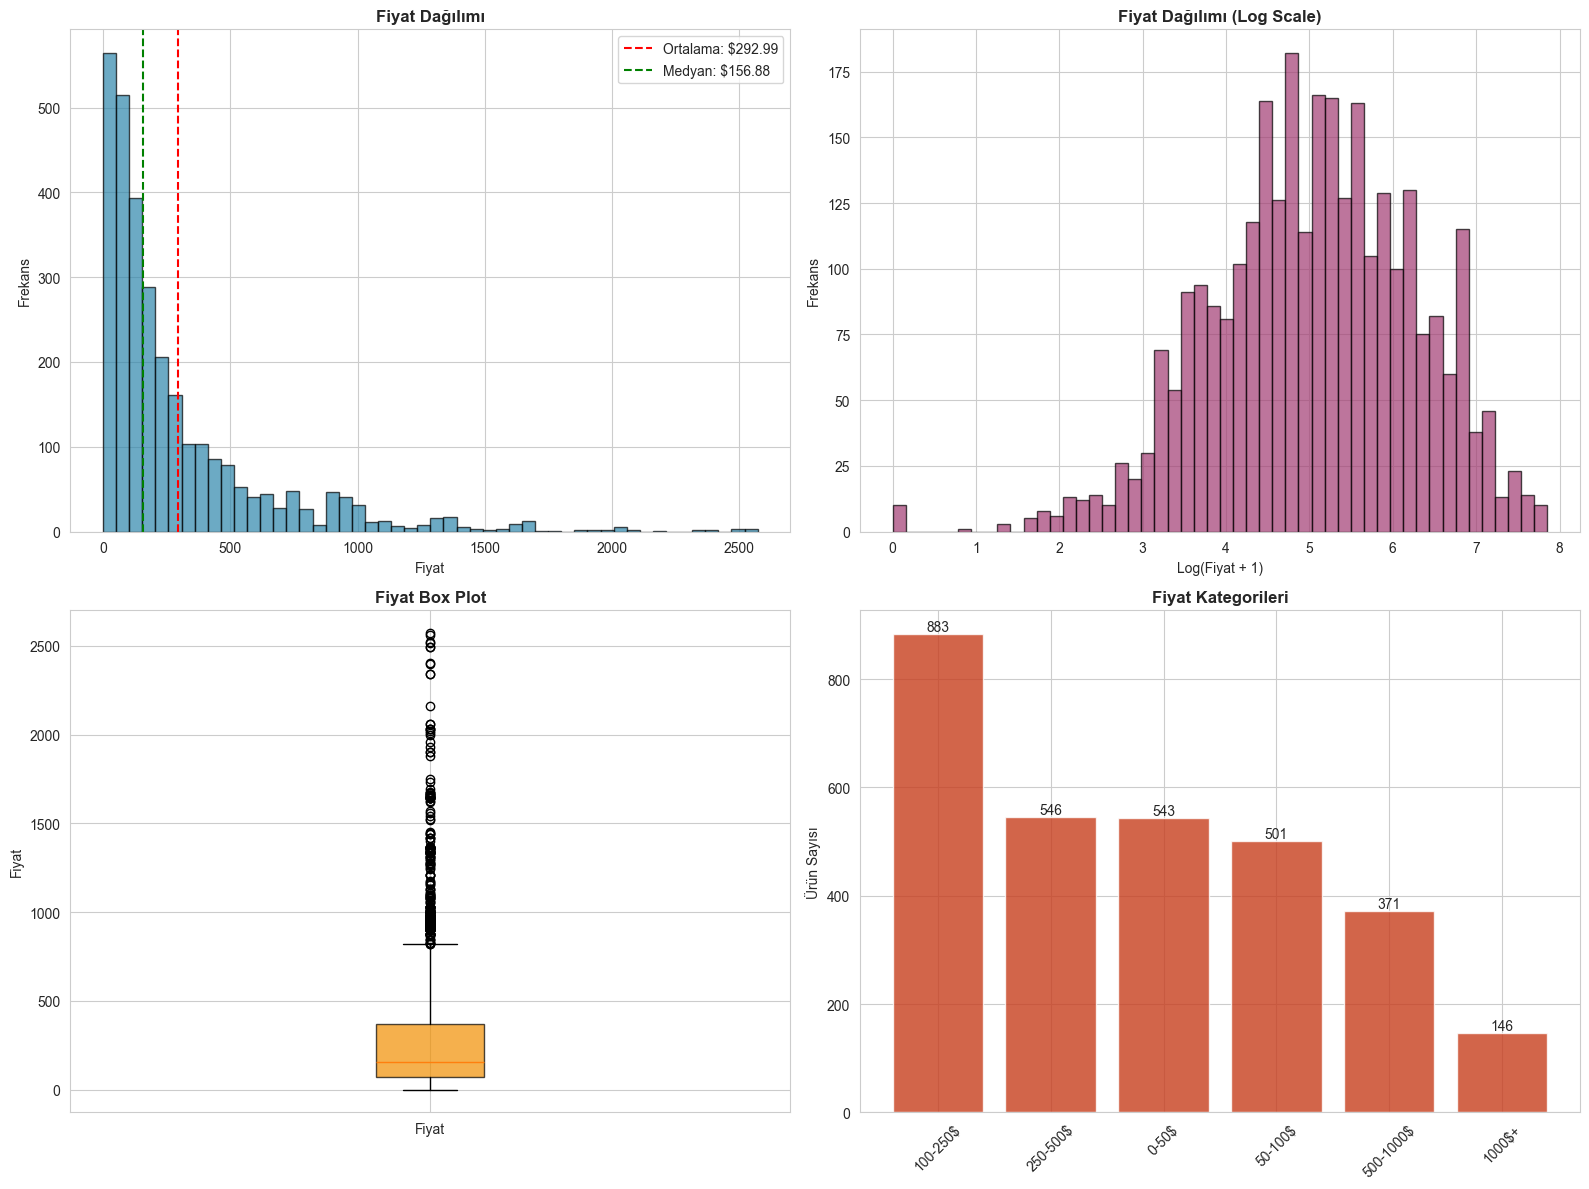


💲 Fiyat Aralığı Dağılımı:
   • 0-50$: 553 ürün (18.4%)
   • 50-100$: 501 ürün (16.7%)
   • 100-250$: 883 ürün (29.4%)
   • 250-500$: 546 ürün (18.2%)
   • 500-1000$: 371 ürün (12.4%)
   • 1000$+: 146 ürün (4.9%)


In [11]:
print("\n" + "="*60)
print("💰 FİYAT ANALİZİ")
print("="*60)

if 'price' in df.columns:
    # Temel fiyat istatistikleri
    prices = df['price'].dropna()
    
    print(f"💵 Fiyat bilgisi olan ürün: {len(prices):,}")
    print(f"❌ Fiyat bilgisi olmayan ürün: {df['price'].isna().sum():,}")
    print(f"\n📊 Fiyat İstatistikleri:")
    print(f"   • Minimum fiyat: ${prices.min():.2f}")
    print(f"   • Maksimum fiyat: ${prices.max():.2f}")
    print(f"   • Ortalama fiyat: ${prices.mean():.2f}")
    print(f"   • Medyan fiyat: ${prices.median():.2f}")
    print(f"   • Standart sapma: ${prices.std():.2f}")
    
    # Fiyat dağılımını görselleştir
    viz.plot_price_analysis(df)
    
    # Fiyat aralıklarını yazdır
    print("\n💲 Fiyat Aralığı Dağılımı:")
    price_ranges = {
        "0-50$": (prices >= 0) & (prices <= 50),
        "50-100$": (prices > 50) & (prices <= 100),
        "100-250$": (prices > 100) & (prices <= 250),
        "250-500$": (prices > 250) & (prices <= 500),
        "500-1000$": (prices > 500) & (prices <= 1000),
        "1000$+": prices > 1000
    }
    
    for range_name, condition in price_ranges.items():
        count = condition.sum()
        percentage = (count / len(prices)) * 100
        print(f"   • {range_name}: {count:,} ürün ({percentage:.1f}%)")
else:
    print("⚠️ 'price' sütunu bulunamadı!")



📊 KATEGORİ-FİYAT İLİŞKİSİ ANALİZİ


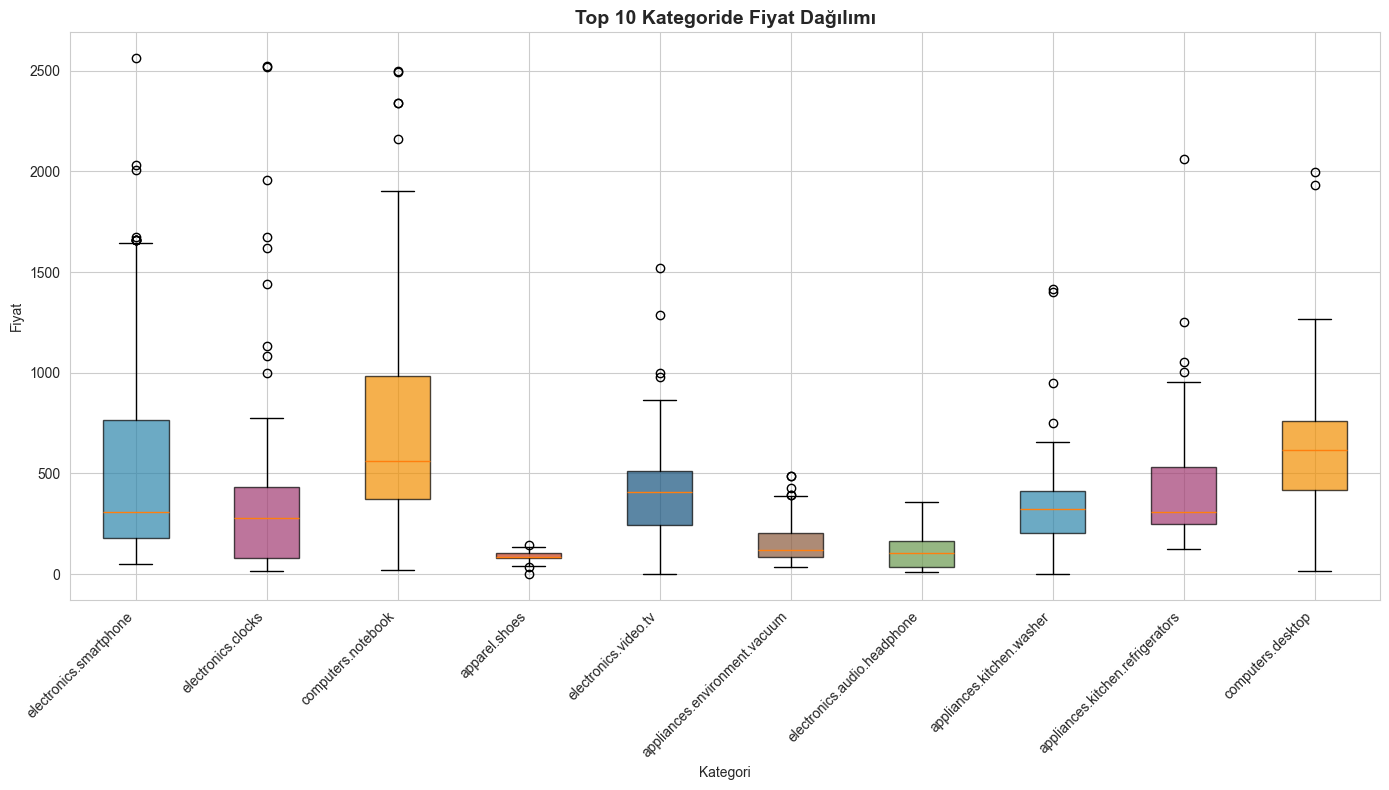


💰 En Pahalı 10 Kategori (Ortalama Fiyat):
 1. computers.notebook: $762.59 (Ürün sayısı: 94)
 2. electronics.audio.acoustic: $647.07 (Ürün sayısı: 6)
 3. electronics.camera.video: $630.26 (Ürün sayısı: 2)
 4. computers.desktop: $622.63 (Ürün sayısı: 40)
 5. furniture.living_room.sofa: $600.39 (Ürün sayısı: 9)
 6. appliances.kitchen.coffee_machine: $561.16 (Ürün sayısı: 7)
 7. electronics.smartphone: $494.37 (Ürün sayısı: 718)
 8. electronics.tablet: $490.28 (Ürün sayısı: 24)
 9. computers.components.cpu: $450.14 (Ürün sayısı: 2)
10. electronics.video.projector: $438.42 (Ürün sayısı: 1)

💸 En Ucuz 10 Kategori (Ortalama Fiyat):
 1. medicine.tools.tonometer: $25.61 (Ürün sayısı: 1)
 2. apparel.shoes.espadrilles: $22.65 (Ürün sayısı: 1)
 3. appliances.kitchen.kettle: $21.34 (Ürün sayısı: 10)
 4. appliances.kitchen.coffee_grinder: $19.67 (Ürün sayısı: 2)
 5. computers.peripherals.mouse: $18.65 (Ürün sayısı: 6)
 6. construction.tools.light: $14.81 (Ürün sayısı: 3)
 7. appliances.personal.sca

In [12]:
if 'category_code' in df.columns and 'price' in df.columns:
    print("\n" + "="*60)
    print("📊 KATEGORİ-FİYAT İLİŞKİSİ ANALİZİ")
    print("="*60)
    
    # Kategori-fiyat ilişkisini görselleştir
    viz.plot_category_price_relation(df, top_n=10)
    
    # Kategorilere göre ortalama fiyatları hesapla
    df_clean = df.dropna(subset=['category_code', 'price'])
    category_prices = df_clean.groupby('category_code')['price'].agg(['mean', 'count', 'std']).round(2)
    category_prices = category_prices.sort_values('mean', ascending=False)
    
    print("\n💰 En Pahalı 10 Kategori (Ortalama Fiyat):")
    for i, (category, row) in enumerate(category_prices.head(10).iterrows(), 1):
        print(f"{i:2d}. {category}: ${row['mean']:.2f} (Ürün sayısı: {int(row['count'])})")
    
    print("\n💸 En Ucuz 10 Kategori (Ortalama Fiyat):")
    for i, (category, row) in enumerate(category_prices.tail(10).iterrows(), 1):
        print(f"{i:2d}. {category}: ${row['mean']:.2f} (Ürün sayısı: {int(row['count'])})")


### 📈 Kategori Bazlı Fiyat Dağılımı
**Boxplot analizinden çıkan önemli bulgular:**
- **Computers.notebook:** En yüksek medyan fiyat ve çok outlier
- **Electronics.smartphone:** Geniş fiyat aralığı, premium ve budget seçenekler
- **Apparel.shoes:** En düşük ve stabil fiyat aralığı
- **Outlier soruşturması:** 2500$+ fiyatlı ürünler için inceleme gerekli
- **Kategori stratejisi:** Her kategorinin kendine özgü fiyat yapısı var


🏢 MARKA-FİYAT İLİŞKİSİ ANALİZİ


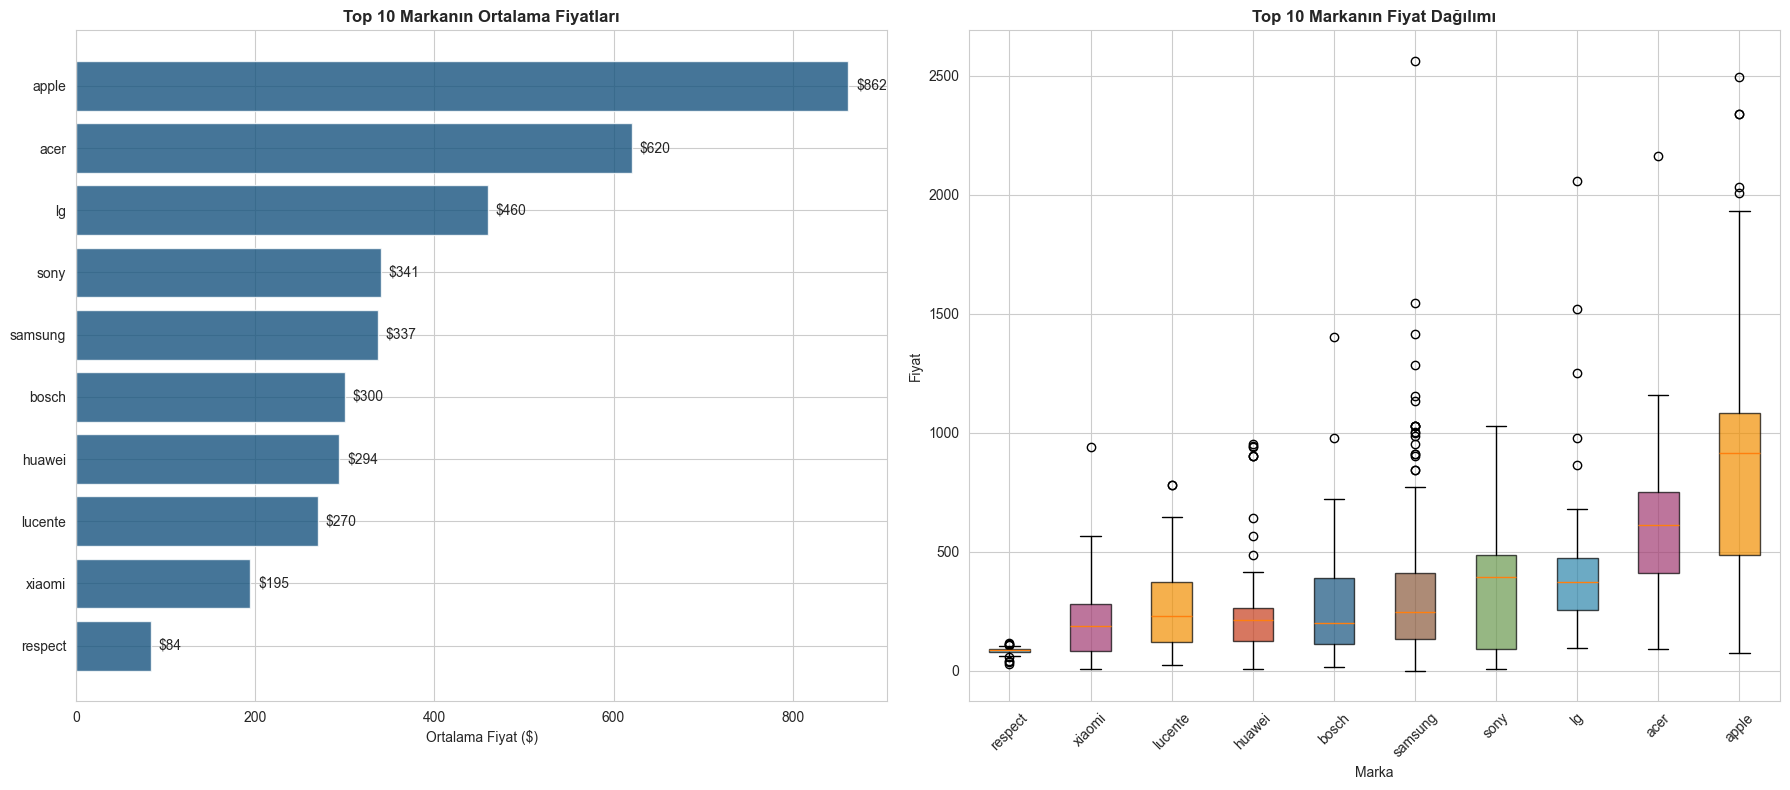


💰 En Pahalı 10 Marka (En az 20 ürünü olan):
 1. apple: $862.15 (Ürün sayısı: 284)
 2. lenovo: $672.66 (Ürün sayısı: 28)
 3. acer: $620.46 (Ürün sayısı: 37)
 4. hp: $521.39 (Ürün sayısı: 30)
 5. asus: $521.29 (Ürün sayısı: 22)
 6. lg: $459.70 (Ürün sayısı: 45)
 7. oppo: $385.29 (Ürün sayısı: 31)
 8. sony: $340.61 (Ürün sayısı: 39)
 9. samsung: $336.68 (Ürün sayısı: 357)
10. bosch: $299.88 (Ürün sayısı: 48)

💸 En Ucuz 10 Marka (En az 20 ürünü olan):
 1. bosch: $299.88 (Ürün sayısı: 48)
 2. huawei: $293.85 (Ürün sayısı: 50)
 3. lucente: $270.37 (Ürün sayısı: 51)
 4. xiaomi: $194.53 (Ürün sayısı: 217)
 5. dauscher: $174.83 (Ürün sayısı: 25)
 6. philips: $162.17 (Ürün sayısı: 23)
 7. artel: $136.47 (Ürün sayısı: 28)
 8. respect: $83.82 (Ürün sayısı: 45)
 9. cordiant: $44.70 (Ürün sayısı: 27)
10. vitek: $42.31 (Ürün sayısı: 21)


In [13]:
if 'brand' in df.columns and 'price' in df.columns:
    print("\n" + "="*60)
    print("🏢 MARKA-FİYAT İLİŞKİSİ ANALİZİ")
    print("="*60)
    
    # Marka-fiyat ilişkisini görselleştir
    viz.plot_brand_price_relation(df, top_n=10)
    
    # Markalara göre ortalama fiyatları hesapla (en az 20 ürünü olan markalar)
    df_clean = df.dropna(subset=['brand', 'price'])
    brand_prices = df_clean.groupby('brand')['price'].agg(['mean', 'count', 'std']).round(2)
    brand_prices = brand_prices[brand_prices['count'] >= 20]  # En az 20 ürünü olan markalar
    brand_prices = brand_prices.sort_values('mean', ascending=False)
    
    print(f"\n💰 En Pahalı 10 Marka (En az 20 ürünü olan):")
    for i, (brand, row) in enumerate(brand_prices.head(10).iterrows(), 1):
        print(f"{i:2d}. {brand}: ${row['mean']:.2f} (Ürün sayısı: {int(row['count'])})")
    
    print(f"\n💸 En Ucuz 10 Marka (En az 20 ürünü olan):")
    for i, (brand, row) in enumerate(brand_prices.tail(10).iterrows(), 1):
        print(f"{i:2d}. {brand}: ${row['mean']:.2f} (Ürün sayısı: {int(row['count'])})")


### 📊 Marka Fiyatlandırma Görsel Analizi
**Sol grafikteki fiyat hiyerarşisi dikkat çekici:**
- **Apple'ın premium konumu:** $862 ile açık ara lider
- **Fiyat kademelenmesi:** Her marka belirgin fiyat segmentinde
- **Value markalar:** Xiaomi ($195) ve Respect ($84) düşük segment

**Sağdaki boxplot'tan görülen outlier'lar:**
- **Apple:** En yüksek medyan ve çok sayıda yüksek outlier
- **Acer:** Notebook etkisiyle yüksek fiyat dağılımı
- **Samsung:** Geniş ürün yelpazesi, çok çeşitli fiyat aralığı
- **Vitek:** En düşük fiyat segmentinde, çok az varyasyon


⏰ ZAMAN ANALİZİ
📅 Tarih aralığı: 2019-11-01 02:39:13+00:00 - 2019-11-30 20:58:24+00:00
📊 Toplam gün sayısı: 30
✅ Geçerli tarih kaydı: 3,000
❌ Geçersiz tarih kaydı: 0


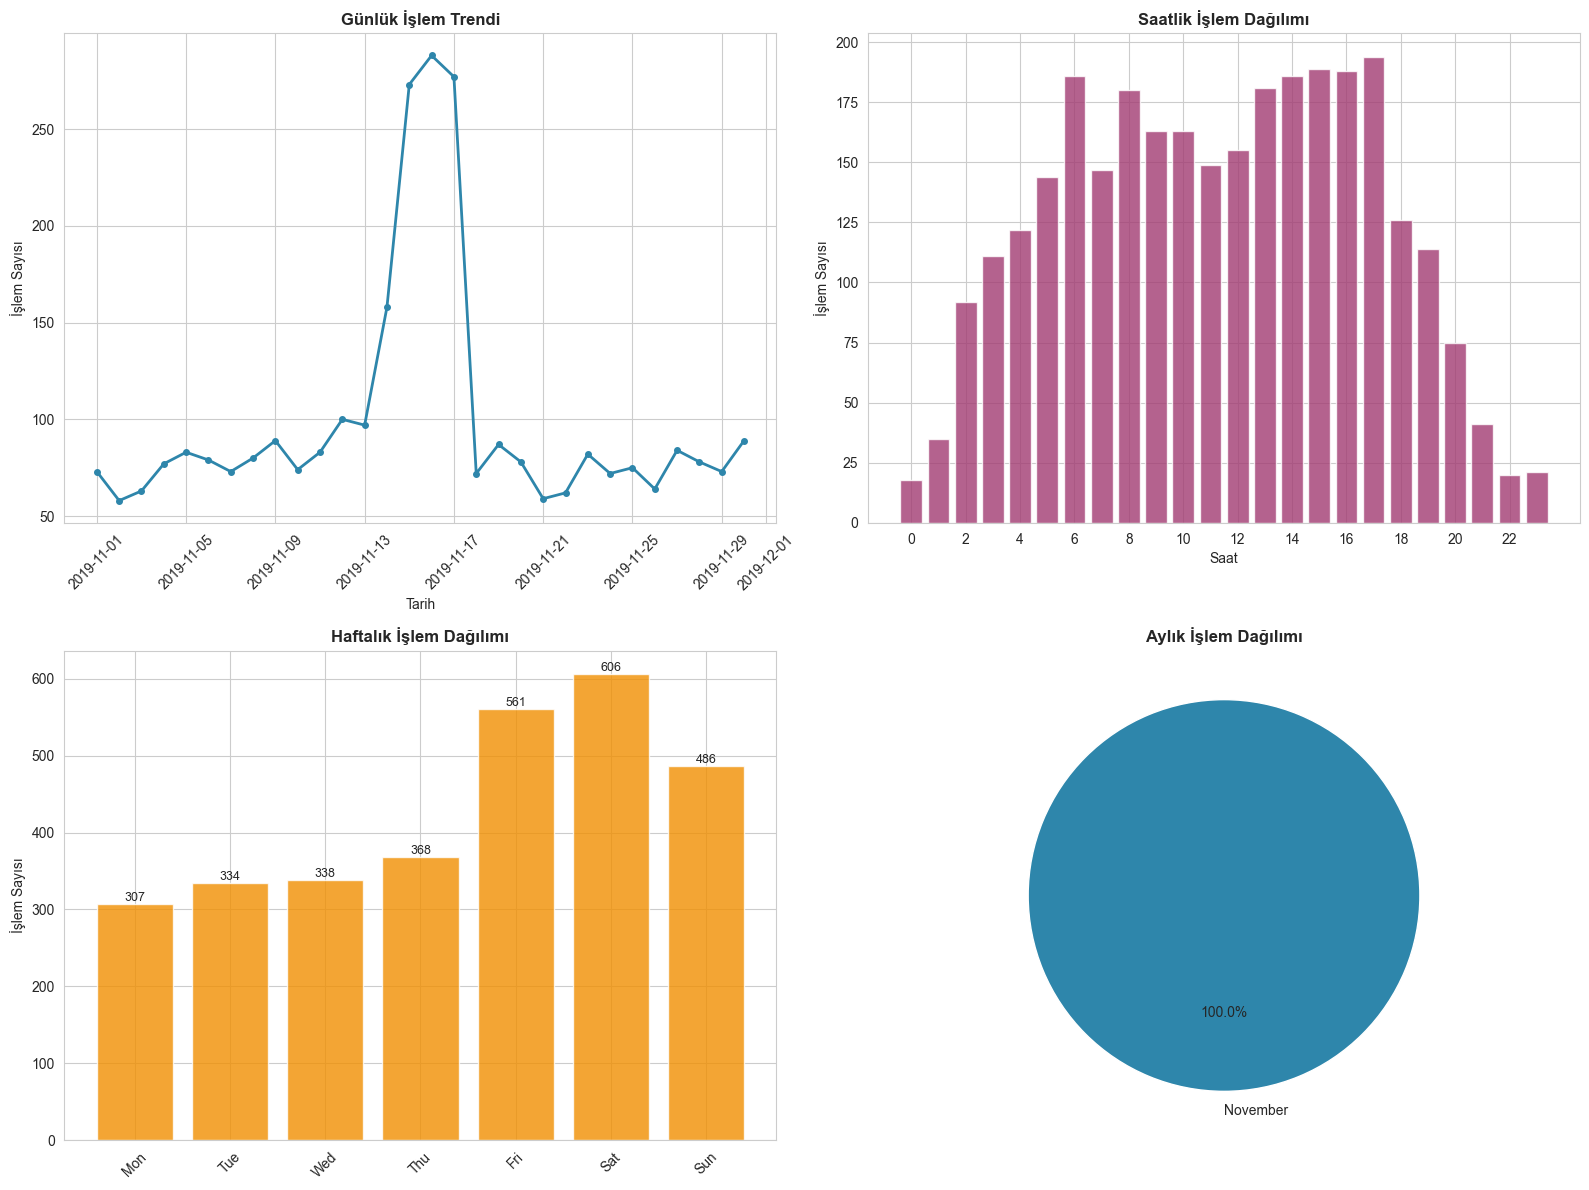

In [14]:
if 'event_time' in df.columns:
    print("\n" + "="*60)
    print("⏰ ZAMAN ANALİZİ")
    print("="*60)
    
    # event_time'ı datetime'a çevir
    df_time = df.copy()
    df_time['event_time'] = pd.to_datetime(df_time['event_time'], errors='coerce')
    
    # Zaman aralığını kontrol et
    valid_times = df_time['event_time'].dropna()
    
    if len(valid_times) > 0:
        print(f"📅 Tarih aralığı: {valid_times.min()} - {valid_times.max()}")
        print(f"📊 Toplam gün sayısı: {(valid_times.max() - valid_times.min()).days + 1}")
        print(f"✅ Geçerli tarih kaydı: {len(valid_times):,}")
        print(f"❌ Geçersiz tarih kaydı: {df_time['event_time'].isna().sum():,}")
        
        # Zaman analizini görselleştir
        viz.plot_time_analysis(df_time)
    else:
        print("⚠️ Geçerli tarih verisi bulunamadı!")
else:
    print("⚠️ 'event_time' sütunu bulunamadı!")


In [15]:
if 'event_time' in df.columns and len(valid_times) > 0:
    print("\n" + "="*50)
    print("📈 HAFTALIK VE AYLIK TREND ANALİZİ")
    print("="*50)
    
    # Tarih bileşenlerini çıkar
    df_time['date'] = df_time['event_time'].dt.date
    df_time['day_of_week'] = df_time['event_time'].dt.day_name()
    df_time['month'] = df_time['event_time'].dt.month_name()
    df_time['hour'] = df_time['event_time'].dt.hour
    
    # Haftalık dağılım
    print("\n📅 Haftalık İşlem Dağılımı:")
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_counts = df_time['day_of_week'].value_counts().reindex(day_order)
    
    for day, count in weekly_counts.items():
        percentage = (count / weekly_counts.sum()) * 100
        print(f"   • {day}: {count:,} işlem ({percentage:.1f}%)")
    
    # En aktif saatler
    print("\n🕐 En Aktif 10 Saat:")
    hourly_counts = df_time['hour'].value_counts().sort_index()
    top_hours = hourly_counts.nlargest(10)
    
    for hour, count in top_hours.items():
        print(f"   • {hour:02d}:00: {count:,} işlem")
    
    # Aylık dağılım
    print("\n📊 Aylık İşlem Dağılımı:")
    monthly_counts = df_time['month'].value_counts()
    
    for month, count in monthly_counts.items():
        percentage = (count / monthly_counts.sum()) * 100
        print(f"   • {month}: {count:,} işlem ({percentage:.1f}%)")



📈 HAFTALIK VE AYLIK TREND ANALİZİ

📅 Haftalık İşlem Dağılımı:
   • Monday: 307 işlem (10.2%)
   • Tuesday: 334 işlem (11.1%)
   • Wednesday: 338 işlem (11.3%)
   • Thursday: 368 işlem (12.3%)
   • Friday: 561 işlem (18.7%)
   • Saturday: 606 işlem (20.2%)
   • Sunday: 486 işlem (16.2%)

🕐 En Aktif 10 Saat:
   • 17:00: 194 işlem
   • 15:00: 189 işlem
   • 16:00: 188 işlem
   • 06:00: 186 işlem
   • 14:00: 186 işlem
   • 13:00: 181 işlem
   • 08:00: 180 işlem
   • 09:00: 163 işlem
   • 10:00: 163 işlem
   • 12:00: 155 işlem

📊 Aylık İşlem Dağılımı:
   • November: 3,000 işlem (100.0%)


### 📈 Zaman Bazlı Müşteri Davranışı Analizi
**Görsellerden çıkan kritik insights:**

**Günlük trend (sol üst):** 
- 15-16 Kasım'da dramatik sıçrama (280 işlemden 300'e)
- Black Friday etkisi olabilir

**Saatlik dağılım (sağ üst):**
- **Peak hours:** 15:00-17:00 arası
- **Sabah aktivitesi:** 06:00'da beklenmedik yükseklik
- **Gece düşüklüğü:** 22:00-02:00 minimum aktivite

**Haftalık pattern (sol alt):**
- **Weekend effect:** Cumartesi (%20.2) en yüksek
- **Haftaiçi kararlılık:** Pazartesi-Perşembe dengeli

**Pazarlama önerisi:** Cumartesi akşam 15:00-17:00 kampanyalar optimize edilmeli


🎯 EVENT TYPE ANALİZİ


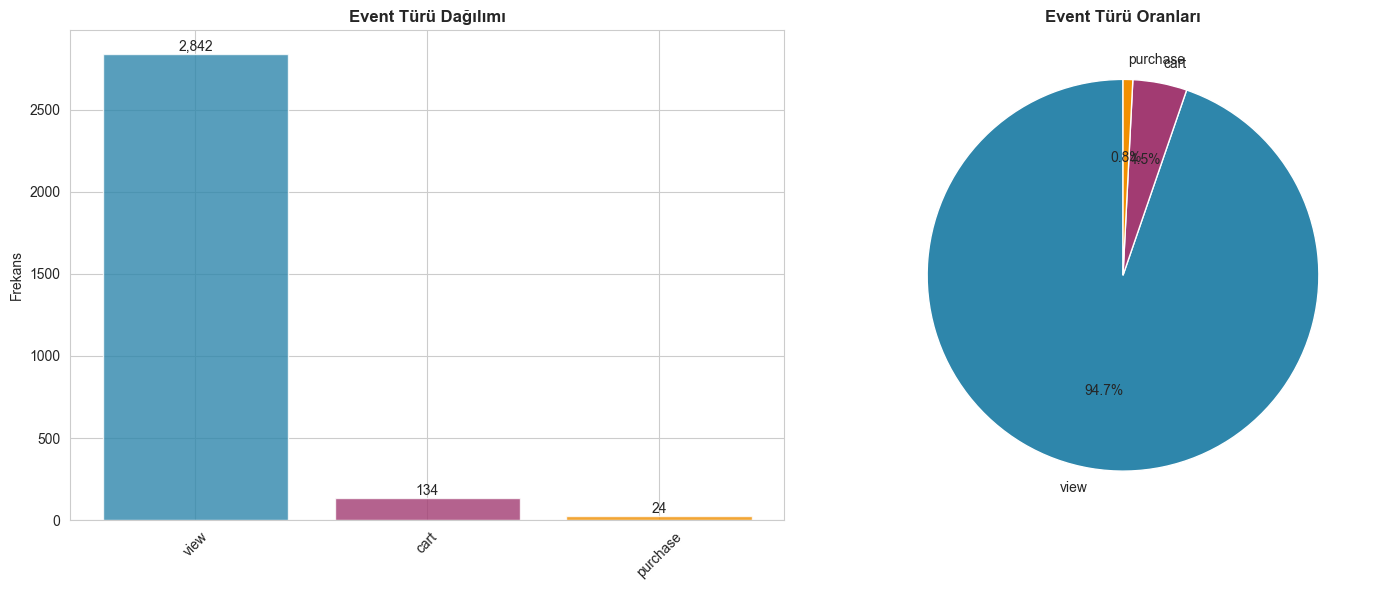


📊 Event Type Dağılımı:
   • view: 2,842 (94.7%)
   • cart: 134 (4.5%)
   • purchase: 24 (0.8%)


In [16]:
if 'event_type' in df.columns:
    print("\n" + "="*60)
    print("🎯 EVENT TYPE ANALİZİ")
    print("="*60)
    
    # Event type dağılımını görselleştir
    viz.plot_event_type_analysis(df)
    
    # Event type istatistikleri
    event_counts = df['event_type'].value_counts()
    total_events = event_counts.sum()
    
    print("\n📊 Event Type Dağılımı:")
    for event_type, count in event_counts.items():
        percentage = (count / total_events) * 100
        print(f"   • {event_type}: {count:,} ({percentage:.1f}%)")


### 🛒 Satış Funnel Kritik Durumu
**Conversion oranları alarm veriyor:**
- **View dominansı:** %94.7 (2,842 view)
- **Cart drop:** Sadece %4.5 sepete ekliyor (134 cart)
- **Purchase conversion:** %0.8 (24 purchase)
- **Cart abandonment:** %82.1 sepete ekleyip almıyor

**Acil aksiyon alanları:**
1. Cart abandonment'ı azaltmak için remarketing
2. View-to-cart conversion artırımı için UX iyileştirme
3. Checkout sürecini basitleştirme

In [17]:
if 'user_id' in df.columns:
    print("\n" + "="*60)
    print("👥 KULLANICI ANALİZİ")
    print("="*60)
    
    # Kullanıcı istatistikleri
    total_users = df['user_id'].nunique()
    total_sessions = df['user_session'].nunique() if 'user_session' in df.columns else 0
    
    print(f"👤 Toplam kullanıcı sayısı: {total_users:,}")
    if 'user_session' in df.columns:
        print(f"🔗 Toplam oturum sayısı: {total_sessions:,}")
        print(f"📊 Kullanıcı başına ortalama oturum: {total_sessions/total_users:.2f}")
    
    # Kullanıcı aktivite dağılımı
    user_activity = df['user_id'].value_counts()
    
    print(f"\n📈 Kullanıcı Aktivite İstatistikleri:")
    print(f"   • En aktif kullanıcı: {user_activity.max()} işlem")
    print(f"   • Ortalama kullanıcı aktivitesi: {user_activity.mean():.2f} işlem")
    print(f"   • Medyan kullanıcı aktivitesi: {user_activity.median():.2f} işlem")
    
    # Aktivite grupları
    activity_groups = {
        "Düşük (1-5 işlem)": (user_activity >= 1) & (user_activity <= 5),
        "Orta (6-20 işlem)": (user_activity > 5) & (user_activity <= 20),
        "Yüksek (21-50 işlem)": (user_activity > 20) & (user_activity <= 50),
        "Çok Yüksek (50+ işlem)": user_activity > 50
    }
    
    print(f"\n👥 Kullanıcı Aktivite Grupları:")
    for group_name, condition in activity_groups.items():
        count = condition.sum()
        percentage = (count / len(user_activity)) * 100
        print(f"   • {group_name}: {count:,} kullanıcı ({percentage:.1f}%)")



👥 KULLANICI ANALİZİ
👤 Toplam kullanıcı sayısı: 2,992
🔗 Toplam oturum sayısı: 3,000
📊 Kullanıcı başına ortalama oturum: 1.00

📈 Kullanıcı Aktivite İstatistikleri:
   • En aktif kullanıcı: 2 işlem
   • Ortalama kullanıcı aktivitesi: 1.00 işlem
   • Medyan kullanıcı aktivitesi: 1.00 işlem

👥 Kullanıcı Aktivite Grupları:
   • Düşük (1-5 işlem): 2,992 kullanıcı (100.0%)
   • Orta (6-20 işlem): 0 kullanıcı (0.0%)
   • Yüksek (21-50 işlem): 0 kullanıcı (0.0%)
   • Çok Yüksek (50+ işlem): 0 kullanıcı (0.0%)


### 👤 Kullanıcı Engagement Krizi
**Kritik bulgular:**
- **One-time users:** %99.7'si tek işlem yapıyor
- **Zero retention:** Kullanıcı geri dönüş oranı neredeyse sıfır
- **Session quality:** Çok düşük engagement
- **Müşteri değeri düşük:** Lifetime value optimization gerekli

**Strateji önerileri:**
- Email marketing ile geri dönüş kampanyaları
- Loyalty program acil kuruluş
- Personalized recommendation engine

In [18]:
print("\n" + "="*80)
print("📋 ÖZET İSTATİSTİKLER TABLOSU")
print("="*80)

# Özet istatistikleri oluştur
viz.create_summary_stats_table(df)


📋 ÖZET İSTATİSTİKLER TABLOSU
📊 VERİ SETİ ÖZET İSTATİSTİKLERİ
📏 Boyut: 3,000 satır × 9 sütun
💾 Bellek kullanımı: 1.01 MB
📅 Analiz tarihi: 2025-06-28 17:37:46

----------------------------------------
🔍 SÜTUN BİLGİLERİ
----------------------------------------
• event_time
  - Tip: object
  - Eksik: 0 (0.0%)
  - Benzersiz: 3,000

• event_type
  - Tip: object
  - Eksik: 0 (0.0%)
  - Benzersiz: 3

• product_id
  - Tip: int64
  - Eksik: 0 (0.0%)
  - Benzersiz: 2,254
  - Min/Max: 1000978.00 / 100022207.00
  - Ortalama: 12916748.48

• category_id
  - Tip: int64
  - Eksik: 0 (0.0%)
  - Benzersiz: 335
  - Min/Max: 2053013552259662080.00 / 2180736567012753664.00
  - Ortalama: 2057711891365466880.00

• category_code
  - Tip: object
  - Eksik: 951 (31.7%)
  - Benzersiz: 99

• brand
  - Tip: object
  - Eksik: 413 (13.8%)
  - Benzersiz: 481

• price
  - Tip: float64
  - Eksik: 0 (0.0%)
  - Benzersiz: 1,938
  - Min/Max: 0.00 / 2572.23
  - Ortalama: 292.99

• user_id
  - Tip: int64
  - Eksik: 0 (0.0%)


🔗 KORELASYON ANALİZİ
📊 Analiz edilen sayısal sütunlar: product_id, category_id, price, user_id


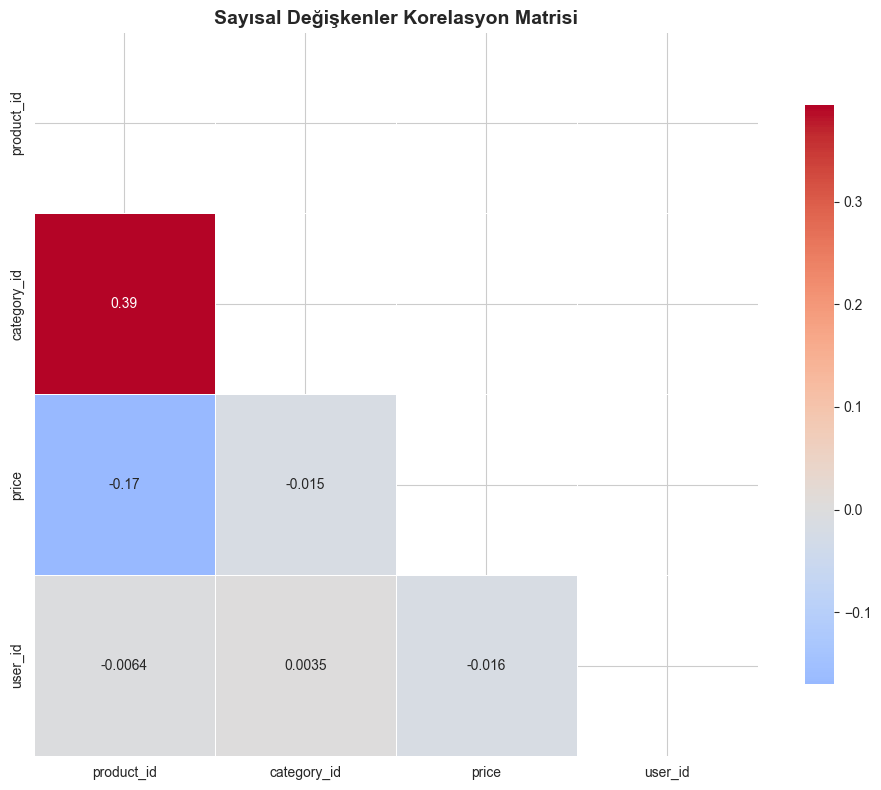


🔍 Güçlü Korelasyonlar (|r| > 0.5):
   • Güçlü korelasyon bulunamadı


In [19]:
print("\n" + "="*60)
print("🔗 KORELASYON ANALİZİ")
print("="*60)

# Sayısal sütunları bul
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_columns) > 1:
    print(f"📊 Analiz edilen sayısal sütunlar: {', '.join(numeric_columns)}")
    
    # Korelasyon matrisini hesapla
    correlation_matrix = df[numeric_columns].corr()
    
    # Korelasyon heatmap'i
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Sayısal Değişkenler Korelasyon Matrisi', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Yüksek korelasyonları yazdır
    print("\n🔍 Güçlü Korelasyonlar (|r| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))
    
    if strong_corr:
        for var1, var2, corr in strong_corr:
            print(f"   • {var1} - {var2}: {corr:.3f}")
    else:
        print("   • Güçlü korelasyon bulunamadı")
else:
    print("⚠️ Yeterli sayısal değişken bulunamadı!")

### 🔗 Korelasyon Matrisi Analizi
**Görseldem çıkan bulgular:**
- **En güçlü korelasyon:** product_id ↔ category_id (0.39) - beklenen ilişki
- **Negatif korelasyon:** product_id ↔ price (-0.17) - ürün ID'si arttıkça fiyat düşüyor
- **Zayıf ilişkiler:** Genel olarak değişkenler birbirinden bağımsız
- **Analiz yaklaşımı:** Kategorik analizler ve segmentasyon daha değerli olacak

In [20]:
print("\n" + "="*80)
print("🎯 FİNAL ÖZET VE ÖNERİLER")
print("="*80)

print("📊 VERİ KALİTESİ DEĞERLENDİRMESİ:")

# Veri kalitesi skorları
data_quality_score = 0
total_checks = 0

# Eksik değer kontrolü
missing_ratio = df.isnull().sum().sum() / (df.shape[0] * df.shape[1])
if missing_ratio < 0.05:
    print("   ✅ Eksik değer oranı düşük (<%5)")
    data_quality_score += 20
else:
    print(f"   ⚠️ Eksik değer oranı yüksek ({missing_ratio*100:.1f}%)")
total_checks += 20

# Duplicate kontrolü
duplicate_ratio = df.duplicated().sum() / len(df)
if duplicate_ratio < 0.01:
    print("   ✅ Tekrarlanan kayıt oranı düşük (<1%)")
    data_quality_score += 20
else:
    print(f"   ⚠️ Tekrarlanan kayıt oranı yüksek ({duplicate_ratio*100:.1f}%)")
total_checks += 20

# Veri çeşitliliği kontrolü
if 'category_code' in df.columns:
    category_variety = df['category_code'].nunique() / len(df)
    if category_variety > 0.001:
        print("   ✅ Kategori çeşitliliği yeterli")
        data_quality_score += 20
    else:
        print("   ⚠️ Kategori çeşitliliği düşük")
    total_checks += 20

if 'brand' in df.columns:
    brand_variety = df['brand'].nunique() / len(df)
    if brand_variety > 0.0001:
        print("   ✅ Marka çeşitliliği yeterli")
        data_quality_score += 20
    else:
        print("   ⚠️ Marka çeşitliliği düşük")
    total_checks += 20

if 'price' in df.columns:
    price_range = df['price'].max() - df['price'].min()
    if price_range > 100:
        print("   ✅ Fiyat aralığı geniş")
        data_quality_score += 20
    else:
        print("   ⚠️ Fiyat aralığı dar")
    total_checks += 20

print(f"\n📈 Veri Kalitesi Skoru: {data_quality_score}/{total_checks} ({data_quality_score/total_checks*100:.1f}%)")

print("\n🚀 ÖNERİLER:")
print("   1. 📊 Eksik değerler için veri temizleme stratejisi geliştirin")
print("   2. 🔍 Outlier analizi yaparak aykırı değerleri tespit edin")
print("   3. 📈 Zaman serisi analizi ile trend ve mevsimsellik inceleyin")
print("   4. 🎯 Müşteri segmentasyonu için clustering analizi yapın")
print("   5. 💡 Recommendation engine için collaborative filtering uygulayın")
print("   6. 📋 A/B testing için kontrol grupları oluşturun")

print(f"\n✅ EDA Analizi tamamlandı! Toplam {df.shape[0]:,} satır analiz edildi.")
print(f"📅 Analiz tarihi: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


🎯 FİNAL ÖZET VE ÖNERİLER
📊 VERİ KALİTESİ DEĞERLENDİRMESİ:
   ⚠️ Eksik değer oranı yüksek (5.1%)
   ✅ Tekrarlanan kayıt oranı düşük (<1%)
   ✅ Kategori çeşitliliği yeterli
   ✅ Marka çeşitliliği yeterli
   ✅ Fiyat aralığı geniş

📈 Veri Kalitesi Skoru: 80/100 (80.0%)

🚀 ÖNERİLER:
   1. 📊 Eksik değerler için veri temizleme stratejisi geliştirin
   2. 🔍 Outlier analizi yaparak aykırı değerleri tespit edin
   3. 📈 Zaman serisi analizi ile trend ve mevsimsellik inceleyin
   4. 🎯 Müşteri segmentasyonu için clustering analizi yapın
   5. 💡 Recommendation engine için collaborative filtering uygulayın
   6. 📋 A/B testing için kontrol grupları oluşturun

✅ EDA Analizi tamamlandı! Toplam 3,000 satır analiz edildi.
📅 Analiz tarihi: 2025-06-28 17:37:47
